In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
morphotopes = gpd.read_parquet('/data/uscuni-ulce/germany_ages/morphotopes_age.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std
morph,,,,,,,,,,,,,,,,,
1154_193_0,"MULTIPOLYGON (((6.73079 49.18655, 6.73079 49.1...",False,1,2,4,6,10,21,43,52,1973.29,1970.0,1949,1953.1,2001.9,2004,17.96
1154_193_6,"MULTIPOLYGON (((6.72705 49.17298, 6.72705 49.1...",False,1,2,5,8,13,25,50,51,1961.25,1960.0,1873,1953.0,1974.0,1976,14.93
1154_193_7,"MULTIPOLYGON (((6.74446 49.18361, 6.74446 49.1...",False,1,2,5,8,13,25,50,42,1960.57,1959.0,1908,1950.0,1973.8,1977,12.20
1154_193_12,"MULTIPOLYGON (((6.74021 49.18476, 6.74016 49.1...",False,1,2,3,4,7,15,31,20,1949.70,1953.0,1861,1939.4,1968.5,1975,24.45
1154_193_10,"MULTIPOLYGON (((6.74131 49.18148, 6.74131 49.1...",False,1,1,1,1,1,1,1,22,1962.64,1962.0,1950,1951.4,1975.7,1978,8.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_8434_14,"MULTIPOLYGON (((13.3172 48.32988, 13.31721 48....",False,1,2,5,8,12,23,47,26,1963.88,1964.0,1949,1951.0,1975.5,1978,9.45
51289_8434_11,"MULTIPOLYGON (((13.31421 48.32426, 13.31407 48...",False,1,2,5,8,13,25,50,48,1972.62,1971.0,1949,1952.7,1998.0,2000,16.73
51289_8434_0,"MULTIPOLYGON (((13.31437 48.3281, 13.31434 48....",False,1,2,5,8,13,25,50,28,1967.89,1967.5,1928,1944.5,1994.9,1999,21.07


In [21]:
morphotopes["num_buildings"].median()

np.float64(47.0)

In [8]:
bins = list(range(1859, 2029, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

def histogram(year_method):
    morphotopes.hist(column=f"year_{year_method}",bins=bins, rwidth=0.8)
    plt.xticks(bin_centers, bin_labels, rotation=90)
    plt.grid(False)

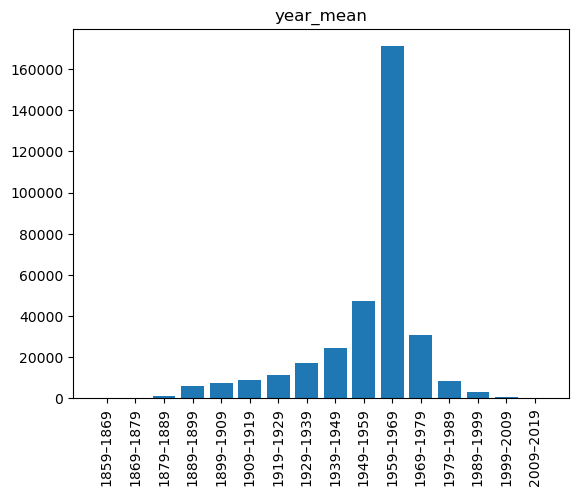

In [9]:
histogram("mean")

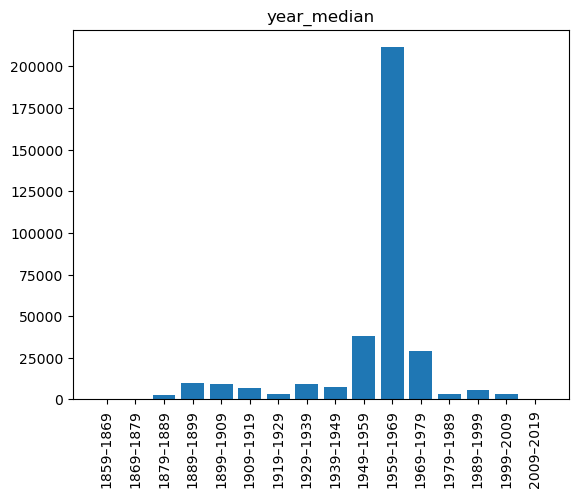

In [10]:
histogram("median")

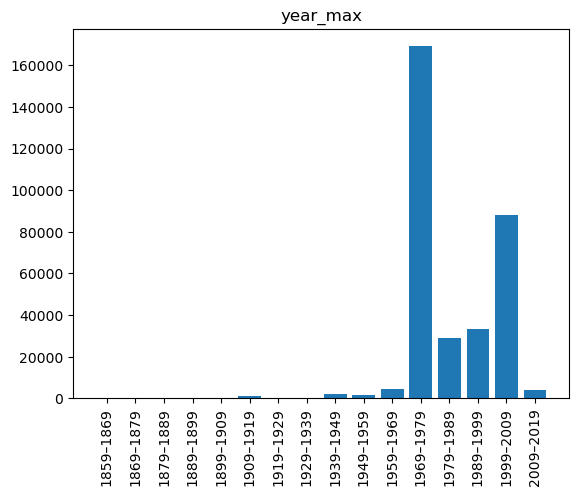

In [11]:
histogram("max")

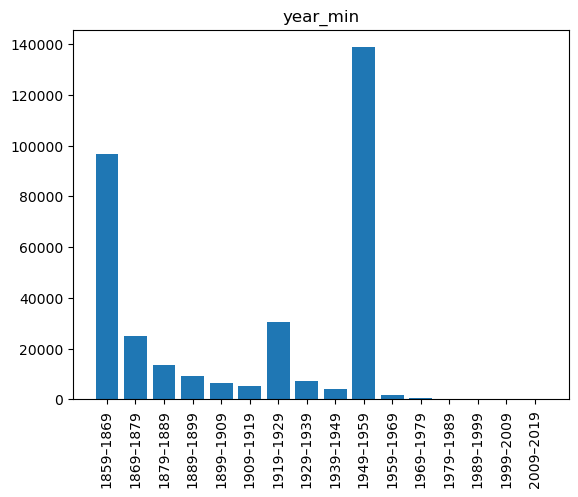

In [12]:
histogram("min")

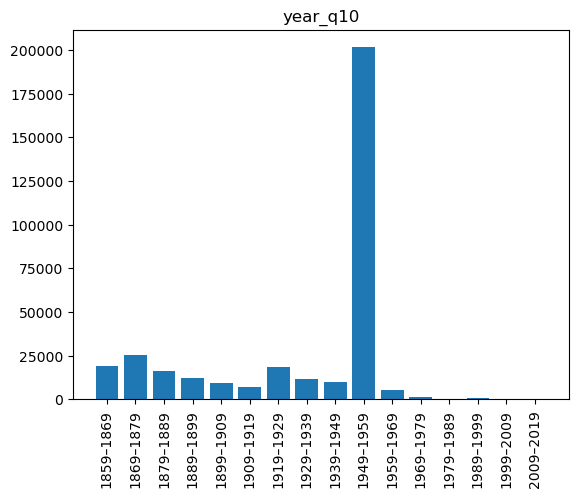

In [13]:
histogram("q10")

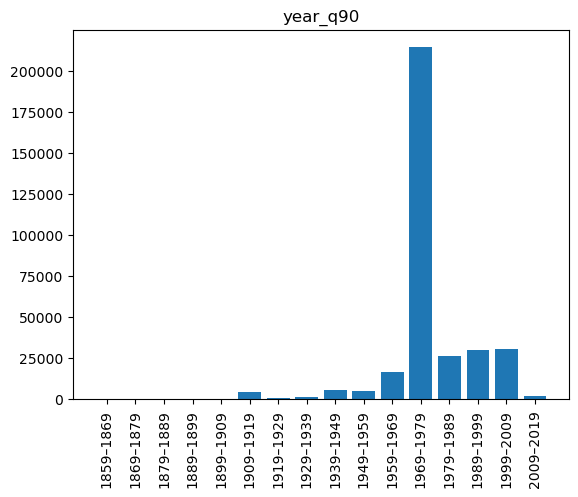

In [14]:
histogram("q90")

In [ ]:
np.histogram(morphotopes["year"], bins=bins)

In [ ]:
morphotopes['year_bin'] = pd.cut(morphotopes['year'], bins=bins, labels=bin_labels, right=False)

avg_buildings = (
    morphotopes
    .groupby('year_bin')['num_buildings']
    .agg(['count', 'mean', 'median', 'min', 'max', 'std', 'sum'])
    .reset_index()
)
avg_buildings

In [8]:
morphotopes['num_buildings'].sum()

np.float64(327509421.0)